<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

PRACTICE LAB - SESSION 3 - Multi Layers Perceptron

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Agenda



*   How to implement MLP model in Keras






# Multi Layers Perceptron


**A Linear Model**

![Linear Model](https://developers.google.com/machine-learning/crash-course/images/linear_net.svg)

**One Hidden Layer**

<img width="500px" height="300px" src="https://i.imgur.com/BF1GNbP.png" />

Can you count the number of parameters for the above model ?

Check your answer in the cell below.




In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

test_model = Sequential()
test_model.add(Dense(5, activation='relu', input_shape=(4,)))


# if this is a binary classification (2 classes) problem
# test_model.add(Dense(1, activation='sigmoid', name='output_layer'))

# if this is a multi-class classification problem
#NUM_CLASSES = 3
#test_model.add(Dense(NUM_CLASSES, activation='softmax', name='output_layer'))

# if this is a regression problem (output is a number)
#test_model.add(Dense(1, activation='linear', name='output_layer'))

# TODO:
# 1. Call the summary() function of model
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 25        
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


![alt text](https://i.imgur.com/VQmgaRP.png)

Keras implement for a Deep Learning Neural Network

In [ ]:
test_model = Sequential()
test_model.add(Dense(7, activation='relu', name='hidden_layer_1', input_shape=(5,)))
test_model.add(Dense(7, activation='relu', name='hidden_layer_2'))
test_model.add(Dense(7, activation='relu', name='hidden_layer_3'))
test_model.add(Dense(7, activation='relu', name='hidden_layer_4'))
test_model.add(Dense(4, activation='softmax', name='output_layer'))
test_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 7)                 42        
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 7)                 56        
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 7)                 56        
_________________________________________________________________
hidden_layer_4 (Dense)       (None, 7)                 56        
_________________________________________________________________
output_layer (Dense)         (None, 4)                 32        
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


# Excercise 1: Neural network for a spiral dataset

Using Neural Network and Softmax Regression for a classification problem

## Load Dataset

In [ ]:
import math
import numpy as np
np.random.seed(1612)

from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

def generate_data():
  N = 5000 # number of points per class
  d0 = 2 # dimensionality
  C = 3 # number of classes
  X = np.zeros((d0, N*C)) # data matrix (each row = single example)
  y = np.zeros(N*C, dtype='uint8') # class labels

  for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
  X = X.T
  Y = to_categorical(y, 3) # one-hot encoding
  return X, y, Y

Use the generate_data() function above to load data

In [ ]:
# TODO:
# 1. Call the generate_data() function above
X,y,Y = generate_data()
print(X.shape)
print(y.shape)
print(Y.shape)

(15000, 2)
(15000,)
(15000, 3)


## Visualize data

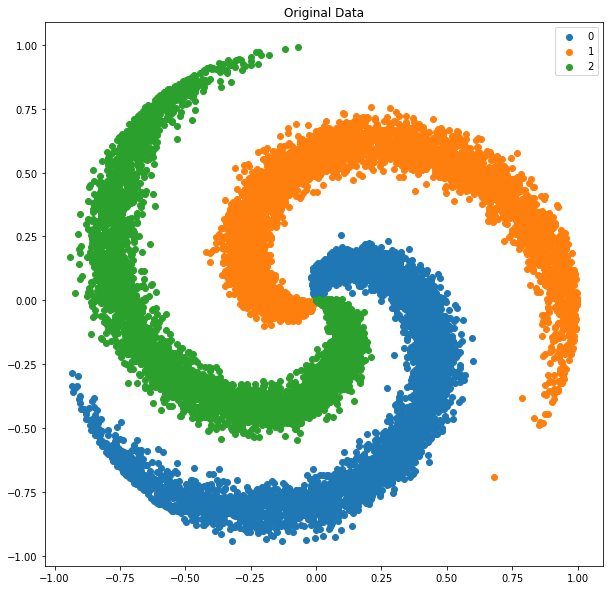

In [ ]:
# TODO
# 1. Use scatter plot to plot the dataset
plt.figure(figsize = (10,10))
plt.scatter(X[np.where(y==0),0],X[np.where(y==0),1])
plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1])
plt.scatter(X[np.where(y==2),0],X[np.where(y==2),1])
plt.legend(['0','1','2'])
plt.title('Original Data')
plt.show()

## Define and train model

Helper function for drawing loss

In [ ]:
def plot_learning_curve(history):

  plt.figure(figsize=(20,10))
  # Define a space with 1 row 2 columns and plot chart at pos 1
  plt.subplot(1,2,1) 
  plt.plot(history.history['loss'])
  plt.title('Loss versus Epochs')
  # Define a space with 1 row 2 columns and plot chart at pos 1
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.title('Accuracy versus Epochs')



Define a Neural Network with Softmax at output layer then compile it

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.random import set_seed
set_seed(42)


# TODO:
# 1. Create a simple neural network with 1 hidden layer
# 2. Compile model
model = Sequential()
model.add(Dense(10,activation='relu',input_shape = X.shape[1:]))
model.add(Dense(3,activation= 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy',verbose = 0)

Call train_model() and draw_chart() to train and visualize model performance

In [ ]:
# TODO
# 1. Train model
# 2.
history = model.fit(X,Y,epochs = 100) 

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.9192 - accuracy: 0.5432
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.6868 - accuracy: 0.6089
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5865 - accuracy: 0.6606
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.5084 - accuracy: 0.7248
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.7873
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3757 - accuracy: 0.8340
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.8744
Epoch 8/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2846 - accuracy: 0.9008
Epoch 9/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2515 - accuracy: 0.9183
Epoch 10/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2238 - accura

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X,Y)

469/469 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9983


[0.020988930016756058, 0.9983333349227905]

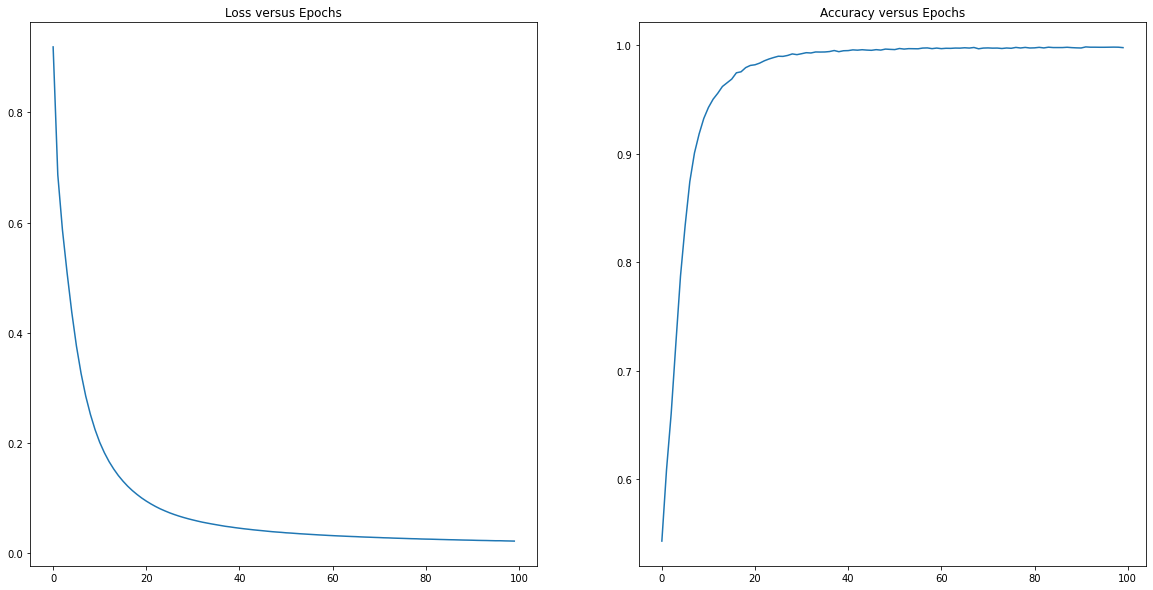

In [ ]:
# TODO
# 1. Call plot learning_curve
plot_learning_curve(history)

## Plot Decision Boundary

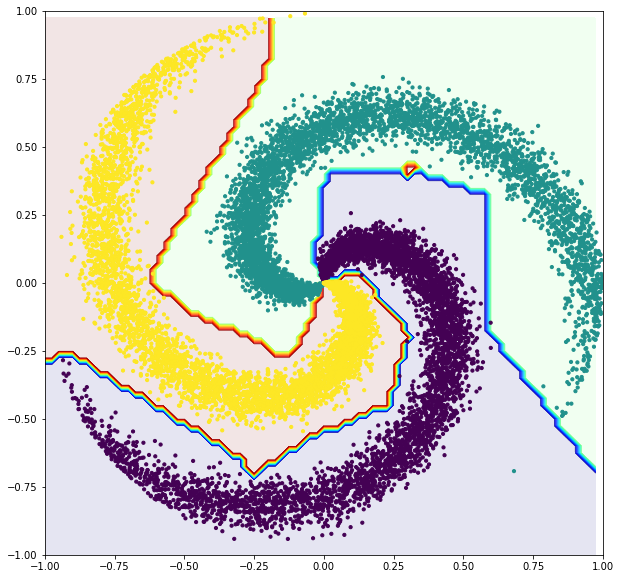

In [ ]:
plt.figure(figsize=(10,10))
xm = np.arange(-1, 1, 0.025)
xlen = len(xm)
ym = np.arange(-1, 1, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

X0 = np.vstack((xx1, yy1)).T

Y_hat = model.predict(X0)

Z = np.argmax(Y_hat, axis=1)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=.1)

plt.scatter(X[:,0], X[:,1], c=y, s=10)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

# Excercise 2: Deep Neural Network to classify clothes

In [ ]:
%reset -f

Apply DNN on Mnist Fashion dataset


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#['Áo thun', 'Quần dài', 'Áo liền quần', 'Đầm', 'Áo khoác',
#               'Sandal', 'Áo sơ mi', 'Giày', 'Túi xách', 'Ủng']

## Import libraries

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
# TODO
# 1. Import libraries 

New Keras's layer: **Flatten**

Usage: Use when you need to **flat out a matrix into a vector**

Example: **Matrix X** with shape (3x3) will become a **vector x** with shape (9x1)

## Load and preprocess dataset

Image data can be:


1.   int array with values from range [0, 255]
2.   float array with values from range [0, 1]



**How to apply scaling for image data**

Since pixel values can be negative, you can not apply Standard Scaler.

The usually used scaler for image data called MinMaxScaler ([Read more](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02))

$X = \frac{X - min(X)}{max(X) - min(X)}$

Apply this to image data:

$img = \frac{img}{ 255}$

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
def load_and_preprocess_data():
  (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
  # TODO:
#   X_train = np.expand_dims(X_train,axis = -1)
#   X_test = np.expand_dims(X_test,axis = -1)
  X_train = X_train/255.0
  X_test = X_test/255.0
  Y_train = to_categorical(y_train,num_classes=10)
  Y_test = to_categorical(y_test, num_classes=10)
  # 1. Convert X_train, X_test to float
  # 2. Apply scaling on X_train, X_test
  # 3. Apply one hot encoding to y_train, y_test
  
  return X_train, Y_train, X_test, Y_test

In [ ]:
X_train, Y_train, X_test, Y_test = load_and_preprocess_data()
print('Shape of X train:', X_train.shape)
print('Shape of Y train:', Y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of Y test:', Y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of Y train: (60000, 10)
Shape of X test: (10000, 28, 28)
Shape of Y test: (10000, 10)


## Visualize Data

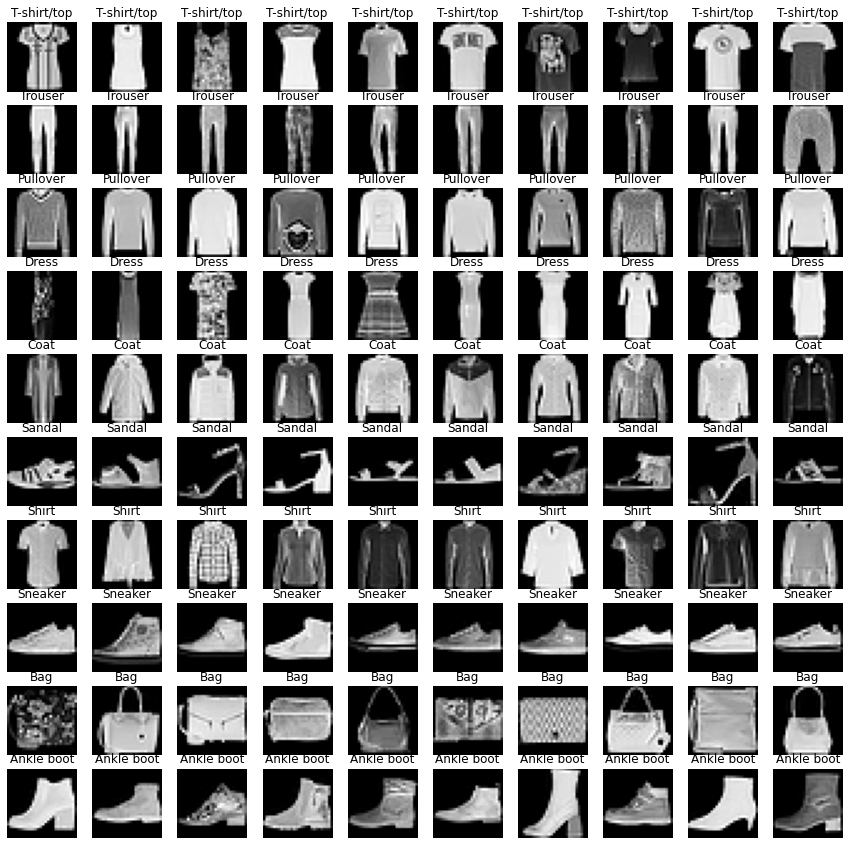

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(10,10)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(10):
  for j in range(10):
    target = np.random.choice(np.where(np.argmax(Y_train, axis=1) == i)[0])
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    axs[i][j].imshow(np.squeeze(X_train[target]), cmap='gray')
    axs[i][j].set_title(class_names[i])
    

## Define Deep Neural Network model

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_37 (Dense)             (None, 1024)              33792     
_________________________________________________________________
dense_38 (Dense)             (None, 10)                10250     
Total params: 69,162
Trainable params: 69,162
Non-trainable params: 0
_________________________________________________________________


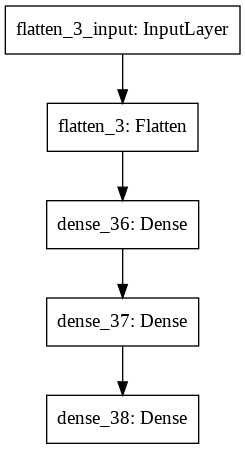

In [ ]:
# TODO:
# 1. Do whatever you want here
# 2. Compile model
model = Sequential()

model.add(Flatten(input_shape = (X_train.shape[1:])))
model.add(Dense(32,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(10, activation = 'softmax'))
# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Activation
# def create_feature_extraction_model(input_shape):
#     model = Sequential()
#     model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu', input_shape = input_shape))
#     model.add(Conv2D(32,(3,3), padding = 'same', activation = 'relu'))
#     model.add(MaxPool2D())
#     model.add(Conv2D(64,(3,3),padding ='same',activation = 'relu'))
#     model.add(Conv2D(64,(3,3),padding ='same',activation = 'relu'))
#     model.add(MaxPool2D())
#     model.add(Flatten())
#     model.add(Dense(1024,activation = 'relu'))
#     return model
# model = create_feature_extraction_model(input_shape=(X_train.shape[1:]))
# model.add(Dense(10))
# model.add(Activation('softmax'))
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model,"model.png")

In [ ]:
def plot_learning_curve(history):

  plt.figure(figsize=(20,10))
  # Define a space with 1 row 2 columns and plot chart at pos 1
  plt.subplot(1,2,1) 
  plt.plot(history.history['loss'])
  plt.title('Loss versus Epochs')
  # Define a space with 1 row 2 columns and plot chart at pos 1
  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'])
  plt.title('Accuracy versus Epochs')



In [ ]:
# TODO
# 1. Train the model
# 2. Plot model's learning curve
model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics = 'accuracy')
history = model.fit(X_test,Y_test,epochs = 60)


Epoch 1/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1491 - accuracy: 0.9446
Epoch 2/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1503 - accuracy: 0.9433
Epoch 3/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1306 - accuracy: 0.9520
Epoch 4/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1264 - accuracy: 0.9494
Epoch 5/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1312 - accuracy: 0.9500
Epoch 6/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1179 - accuracy: 0.9559
Epoch 7/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1237 - accuracy: 0.9517
Epoch 8/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9571
Epoch 9/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1081 - accuracy: 0.9619
Epoch 10/60
313/313 [==============================] - 1s 2ms/step - loss: 0.1055 - accuracy: 0.9585

## Evaluate and Inference

In [ ]:
# TODO
# 1. Evaluate model performance on Test Set
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9988


[0.0065652490593492985, 0.9987999796867371]

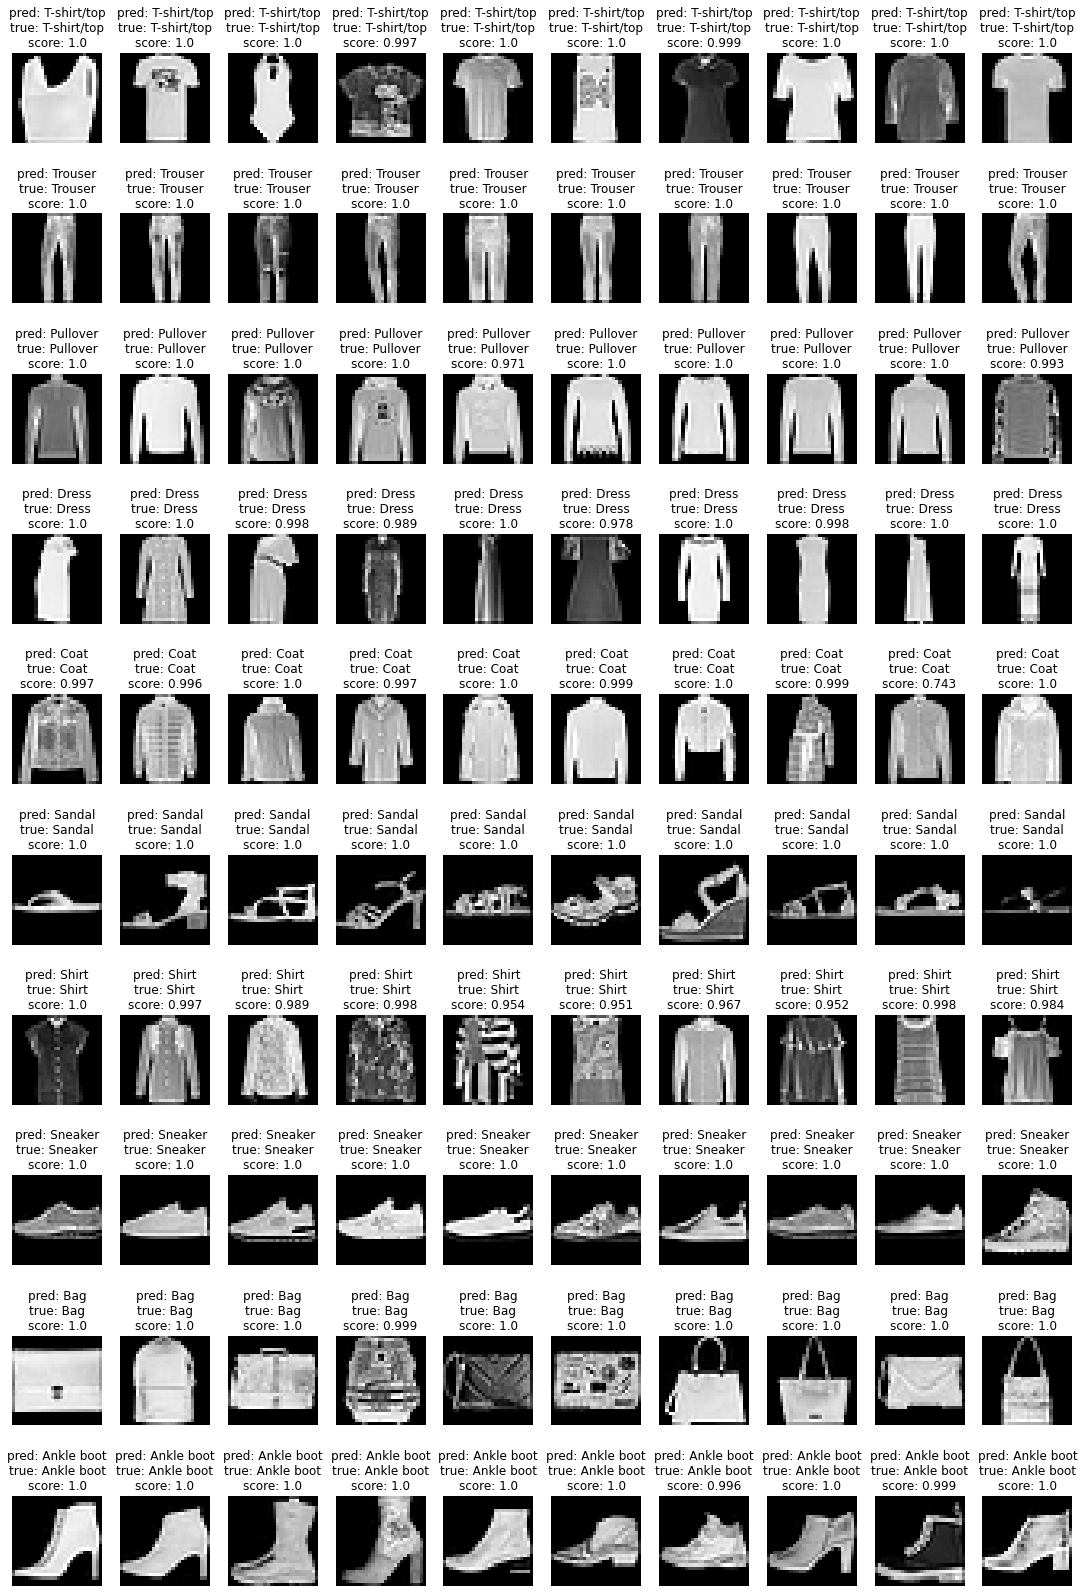

In [ ]:
fig, axs = plt.subplots(10,10)
fig.set_figheight(3 * 10 - 1)
fig.set_figwidth(2 * 10 - 1)
for i in range(10):
  targets = np.where(np.argmax(Y_test, axis=1) == i)[0]
  for j in range(10):
    axs[i][j].grid('off')
    axs[i][j].axis('off')
    target = np.random.choice(targets)
    temp = X_test[target]
    temp = temp[None,...]
    pred = model.predict(temp)
    axs[i][j].imshow(np.squeeze(temp), cmap='gray')
    axs[i][j].set_title("pred: {}\ntrue: {}\nscore: {:.3}".format(
              class_names[np.argmax(pred)], 
              class_names[np.argmax(Y_test[target])], 
              np.max(pred)
    ))

# Save and Load Keras Model

In [ ]:
import os
MODEL_PATH = '/content/drive/My Drive/COTAI_Training/MLP/saved_models/'
# model.save(os.path.join(MODEL_PATH, 'my_model'))



In [ ]:
from tensorflow.keras.models import load_model

load = load_model(os.path.join(MODEL_PATH, 'my_model'))
load.evaluate(X_test, Y_test)

OSError: ignored